<a href="https://colab.research.google.com/github/irfkirf/Norm-dtsc-3601-project/blob/ed-eda-setup/ed_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
df = pd.read_csv("crimeData.csv")

df.shape
df.head()
df.sample()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
85383,201905232,01/28/2020 12:00:00 AM,01/28/2020 12:00:00 AM,1525,19,Mission,1985,1,350,"THEFT, PERSON",...,IC,Invest Cont,350.0,NaN,NaN,NaN,8300 VAN NUYS BL,NaN,34.2216,-118.4488


In [13]:
df['Crm Cd Desc'].value_counts().head(10)  # Top 10 crime types

,count
Crm Cd Desc,
VEHICLE - STOLEN,115190
BATTERY - SIMPLE ASSAULT,74839
BURGLARY FROM VEHICLE,63517
THEFT OF IDENTITY,62537
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",61092
BURGLARY,57871
THEFT PLAIN - PETTY ($950 & UNDER),53717
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",53525
INTIMATE PARTNER - SIMPLE ASSAULT,46712


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004991 entries, 0 to 1004990
Data columns (total 28 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   DR_NO           1004991 non-null  int64  
 1   Date Rptd       1004991 non-null  object 
 2   DATE OCC        1004991 non-null  object 
 3   TIME OCC        1004991 non-null  int64  
 4   AREA            1004991 non-null  int64  
 5   AREA NAME       1004991 non-null  object 
 6   Rpt Dist No     1004991 non-null  int64  
 7   Part 1-2        1004991 non-null  int64  
 8   Crm Cd          1004991 non-null  int64  
 9   Crm Cd Desc     1004991 non-null  object 
 10  Mocodes         853372 non-null   object 
 11  Vict Age        1004991 non-null  int64  
 12  Vict Sex        860347 non-null   object 
 13  Vict Descent    860335 non-null   object 
 14  Premis Cd       1004975 non-null  float64
 15  Premis Desc     1004403 non-null  object 
 16  Weapon Used Cd  327247 non-null   fl

,0
DR_NO,0
Date Rptd,0
DATE OCC,0
TIME OCC,0
AREA,0
AREA NAME,0
Rpt Dist No,0
Part 1-2,0
Crm Cd,0
Crm Cd Desc,0


In [5]:


for i, col in enumerate(df.columns):
    print(f"{i}: {col}")


0: DR_NO
1: Date Rptd
2: DATE OCC
3: TIME OCC
4: AREA
5: AREA NAME
6: Rpt Dist No
7: Part 1-2
8: Crm Cd
9: Crm Cd Desc
10: Mocodes
11: Vict Age
12: Vict Sex
13: Vict Descent
14: Premis Cd
15: Premis Desc
16: Weapon Used Cd
17: Weapon Desc
18: Status
19: Status Desc
20: Crm Cd 1
21: Crm Cd 2
22: Crm Cd 3
23: Crm Cd 4
24: LOCATION
25: Cross Street
26: LAT
27: LON


In [6]:
df.isnull().sum().sort_values(ascending=False)


,0
Crm Cd 4,1004927
Crm Cd 3,1002677
Crm Cd 2,935831
Cross Street,850755
Weapon Used Cd,677744
Weapon Desc,677744
Mocodes,151619
Vict Descent,144656
Vict Sex,144644
Premis Desc,588


In [15]:
drop_cols = ["DR_NO", "Date Rptd", "Rpt Dist No",
             "Status", "Status Desc", "Cross Street", "Part 1-2"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')
df['Vict Age'] = pd.to_numeric(df['Vict Age'], errors='coerce')
df['Vict Age Group'] = pd.cut(df['Vict Age'],
                              bins=[0, 17, 30, 50, 120],
                              labels=["<18", "18-30", "31-50", "51+"])

=
df['Vict Sex'] = df['Vict Sex'].fillna("Unknown")

df['Vict Descent'] = df['Vict Descent'].fillna("Unknown")
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'],
                                format='%m/%d/%Y',
                                errors='coerce')
df['Month'] = df['DATE OCC'].dt.month
df['DayOfWeek'] = df['DATE OCC'].dt.day_name()

df['Hour'] = (df['TIME OCC'] // 100).astype("Int64")
df['TimeOfDay'] = pd.cut(df['Hour'], bins=[-1,5,11,17,23],
                         labels=["Night","Morning","Afternoon","Evening"])

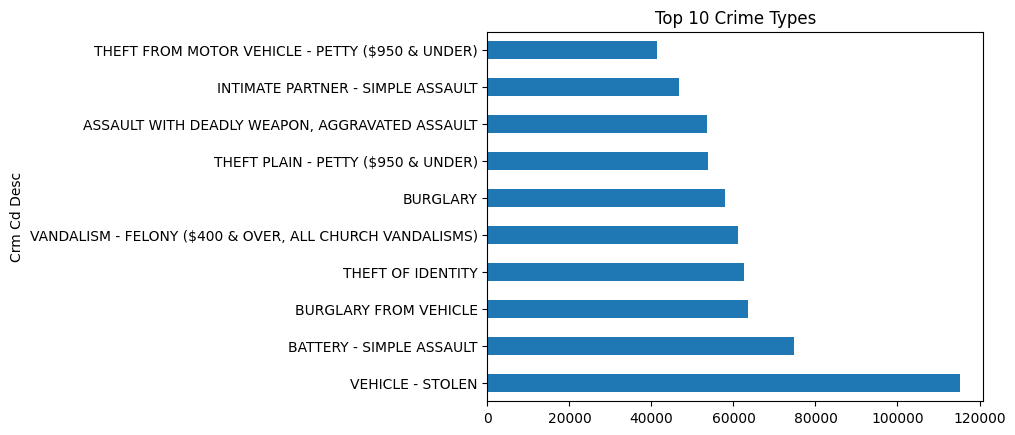

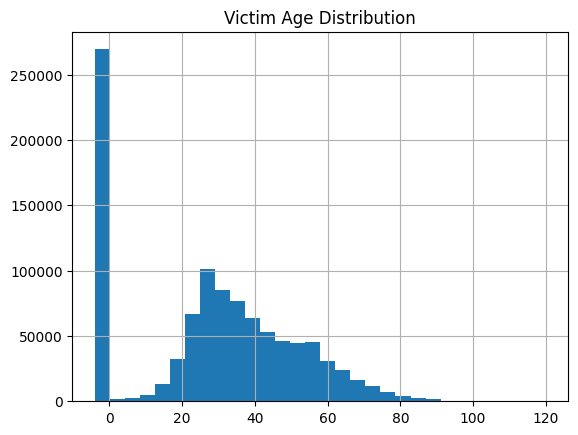

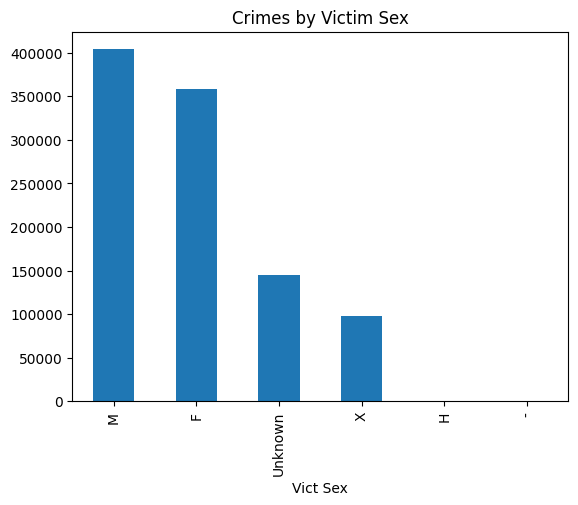

In [17]:
import matplotlib.pyplot as plt
# Top crime types
df['Crm Cd Desc'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Crime Types")
plt.show()

# Victim age distribution
df['Vict Age'].hist(bins=30)
plt.title("Victim Age Distribution")
plt.show()

# Crime counts by sex
df['Vict Sex'].value_counts().plot(kind='bar')
plt.title("Crimes by Victim Sex")
plt.show()


In [20]:
# Crime type vs Age Group
pd.crosstab(df['Vict Age Group'], df['Crm Cd Desc']).apply(lambda r: r/r.sum(), axis=1).head()

Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Vict Age Group,,,,,,,,,,,,,,,,,,,,,
<18,0.000469,0.000195,0.092117,0.008008,0.159466,0.000000,0.000117,0.030745,0.000000,0.000000,...,0.000430,0.003438,0.001758,0.000117,0.000039,0.000234,0.005000,0.009259,0.000703,0.000000
18-30,0.001219,0.000642,0.075821,0.005868,0.092096,0.000193,0.001788,0.007376,0.000005,0.000009,...,0.000445,0.057337,0.022615,0.004098,0.000458,0.001669,0.005593,0.011255,0.000917,0.000037
31-50,0.002108,0.000314,0.067501,0.005383,0.089698,0.000358,0.000862,0.003880,0.000006,0.000006,...,0.000701,0.067904,0.027631,0.005012,0.000472,0.000859,0.010103,0.016706,0.001344,0.000010
51+,0.002953,0.000085,0.064084,0.005826,0.121430,0.000102,0.000210,0.002856,0.000006,0.000000,...,0.000759,0.069973,0.036213,0.006342,0.000544,0.000618,0.009583,0.020073,0.001468,0.000017


In [19]:


# Crime type vs Victim Sex
pd.crosstab(df['Vict Sex'], df['Crm Cd Desc']).head()




Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
Vict Sex,,,,,,,,,,,,,,,,,,,,,
-,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
F,607,68,14329,1221,35142,6,190,3767,2,3,...,259,21392,10198,1468,129,207,4333,8896,681,4
H,0,1,6,1,7,0,0,0,0,0,...,0,8,1,0,0,0,0,1,0,0
M,1211,641,38173,3113,39222,216,1190,375,5,3,...,225,28027,10959,2195,341,528,1960,2779,234,14
Unknown,3,0,15,3,9,0,2,1,0,0,...,0,29,10,3,114593,2153,1,0,0,0


In [18]:


# Crime type vs Neighborhood
pd.crosstab(df['AREA NAME'], df['Crm Cd Desc']).head()


Crm Cd Desc,ARSON,ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",ATTEMPTED ROBBERY,BATTERY - SIMPLE ASSAULT,BATTERY ON A FIREFIGHTER,BATTERY POLICE (SIMPLE),BATTERY WITH SEXUAL CONTACT,"BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM",BIGAMY,...,UNAUTHORIZED COMPUTER ACCESS,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",VANDALISM - MISDEAMEANOR ($399 OR UNDER),VEHICLE - ATTEMPT STOLEN,VEHICLE - STOLEN,"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",VIOLATION OF COURT ORDER,VIOLATION OF RESTRAINING ORDER,VIOLATION OF TEMPORARY RESTRAINING ORDER,WEAPONS POSSESSION/BOMBING
AREA NAME,,,,,,,,,,,,,,,,,,,,,
77th Street,203,82,5921,483,4707,7,281,179,0,0,...,10,3399,1741,281,8767,4,231,672,18,2
Central,232,157,4048,457,6806,47,329,394,2,1,...,12,4808,1686,145,5050,209,142,282,11,3
Devonshire,53,15,1329,110,2696,7,59,171,0,0,...,33,2110,786,116,3959,62,353,381,131,0
Foothill,95,52,1741,104,2419,7,68,141,1,0,...,11,2008,873,110,4539,10,397,512,56,3
Harbor,91,26,2342,169,3157,10,83,126,0,0,...,13,2759,1335,321,6140,48,404,1196,18,4


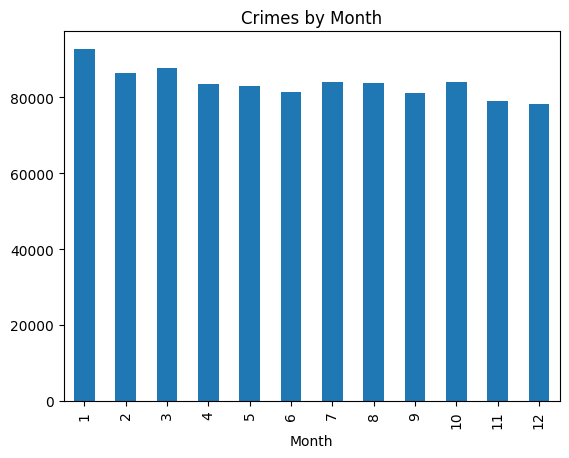

In [21]:
# Crimes by month
df['Month'].value_counts().sort_index().plot(kind='bar')
plt.title("Crimes by Month")
plt.show()


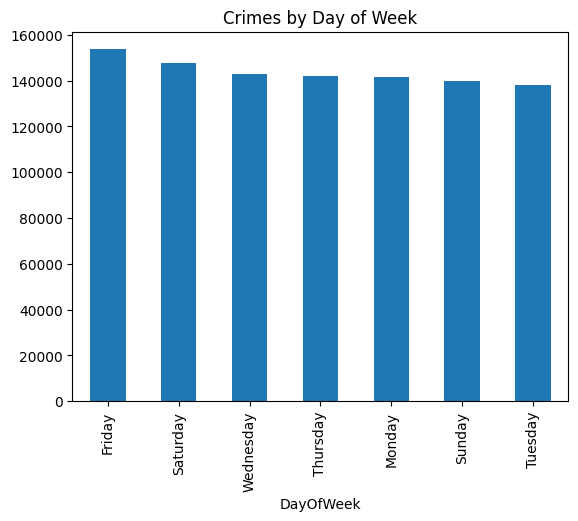

In [22]:


# Crimes by day of week
df['DayOfWeek'].value_counts().plot(kind='bar')
plt.title("Crimes by Day of Week")
plt.show()



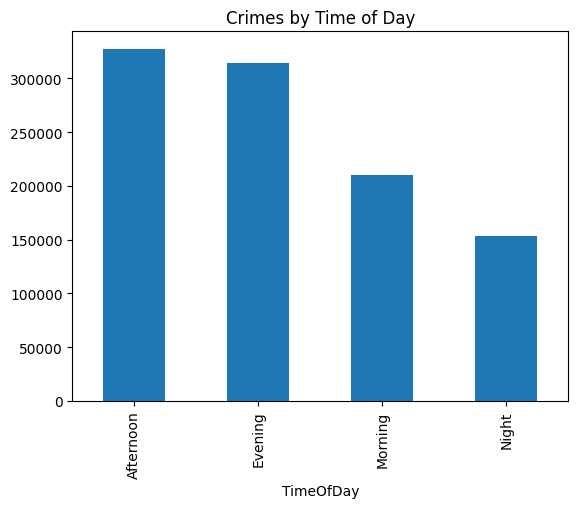

In [23]:
# Crimes by time of day
df['TimeOfDay'].value_counts().plot(kind='bar')
plt.title("Crimes by Time of Day")
plt.show()

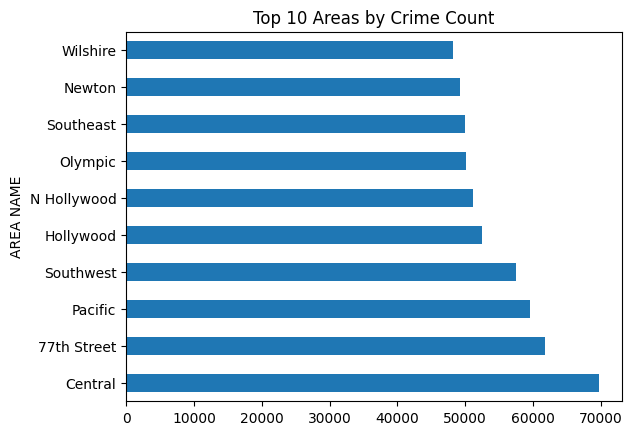

In [24]:
# Crimes per neighborhood
df['AREA NAME'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Areas by Crime Count")
plt.show()


In [27]:

def simplify_crime_type(df, col="Crm Cd Desc"):

    violent_keywords = [
        "ASSAULT", "BATTERY", "HOMICIDE", "MURDER",
        "RAPE", "SEXUAL", "KIDNAPPING", "ROBBERY"
    ]
    property_keywords = [
        "BURGLARY", "THEFT", "STOLEN", "VEHICLE", "ARSON",
        "VANDALISM", "SHOPLIFTING", "LARCENY"
    ]

    def categorize(desc):
        if any(word in desc.upper() for word in violent_keywords):
            return "Violent"
        elif any(word in desc.upper() for word in property_keywords):
            return "Property"
        else:
            return "Other"

    df["Crime Group"] = df[col].astype(str).apply(categorize)
    return df

# --- Usage ---
df = simplify_crime_type(df, col="Crm Cd Desc")

# Check distribution
print(df["Crime Group"].value_counts())


Crime Group
Property    635227
Violent     249921
Other       119843
Name: count, dtype: int64


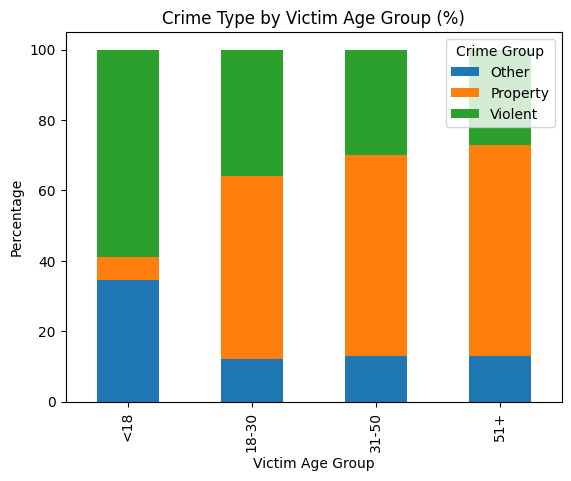

In [28]:
age_crime = pd.crosstab(df['Vict Age Group'], df['Crime Group'], normalize='index') * 100
age_crime.plot(kind='bar', stacked=True)
plt.title("Crime Type by Victim Age Group (%)")
plt.ylabel("Percentage")
plt.xlabel("Victim Age Group")
plt.legend(title="Crime Group")
plt.show()


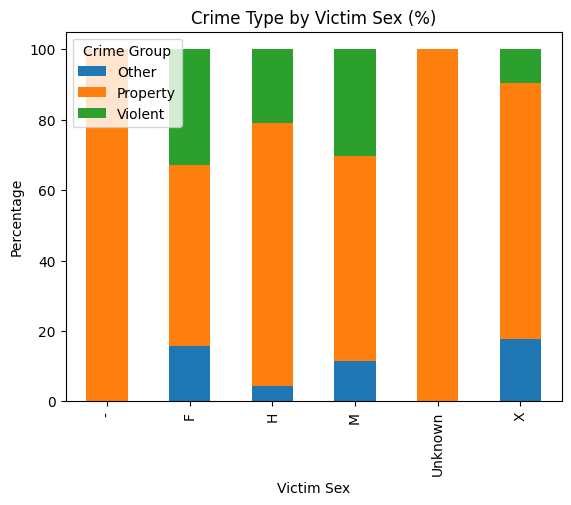

In [29]:
sex_crime = pd.crosstab(df['Vict Sex'], df['Crime Group'], normalize='index') * 100
sex_crime.plot(kind='bar', stacked=True)
plt.title("Crime Type by Victim Sex (%)")
plt.ylabel("Percentage")
plt.xlabel("Victim Sex")
plt.legend(title="Crime Group")
plt.show()


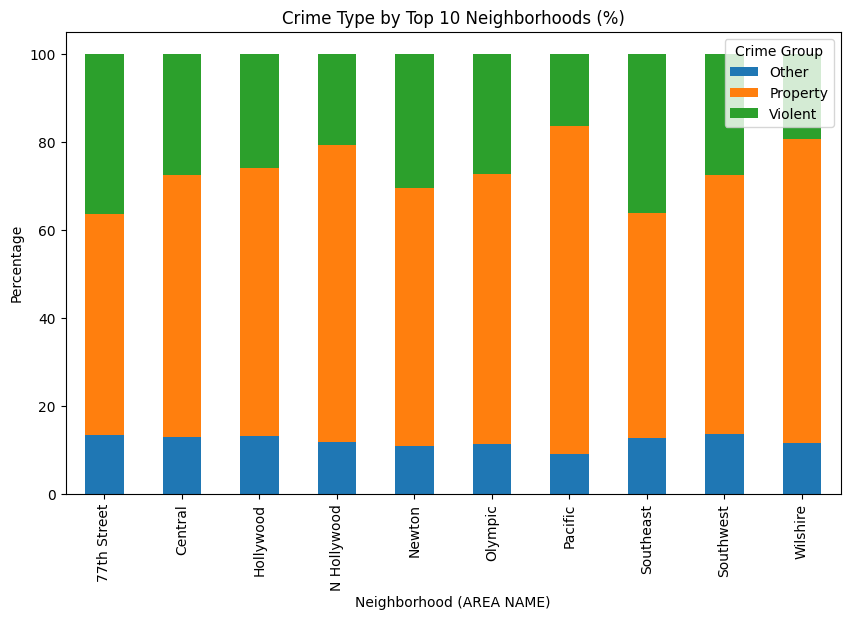

In [30]:
top_areas = df['AREA NAME'].value_counts().nlargest(10).index
area_crime = pd.crosstab(df[df['AREA NAME'].isin(top_areas)]['AREA NAME'],
                         df['Crime Group'], normalize='index') * 100
area_crime.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Crime Type by Top 10 Neighborhoods (%)")
plt.ylabel("Percentage")
plt.xlabel("Neighborhood (AREA NAME)")
plt.legend(title="Crime Group")
plt.show()


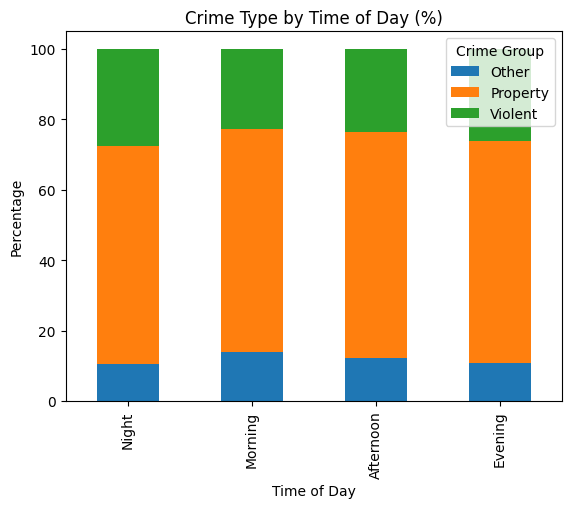

In [31]:
time_crime = pd.crosstab(df['TimeOfDay'], df['Crime Group'], normalize='index') * 100
time_crime.plot(kind='bar', stacked=True)
plt.title("Crime Type by Time of Day (%)")
plt.ylabel("Percentage")
plt.xlabel("Time of Day")
plt.legend(title="Crime Group")
plt.show()


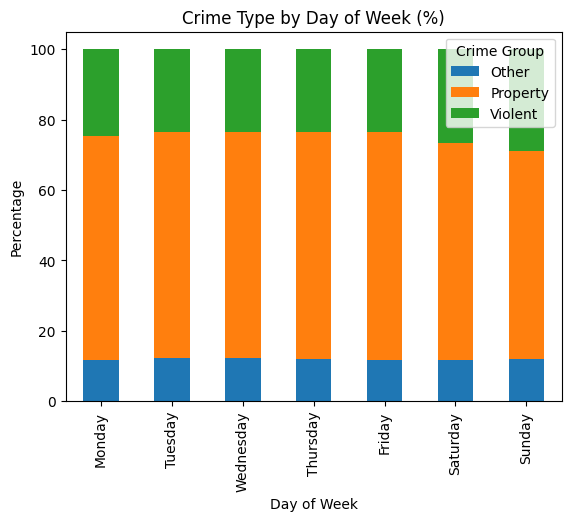

In [32]:
dow_crime = pd.crosstab(df['DayOfWeek'], df['Crime Group'], normalize='index') * 100
dow_crime = dow_crime.reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
dow_crime.plot(kind='bar', stacked=True)
plt.title("Crime Type by Day of Week (%)")
plt.ylabel("Percentage")
plt.xlabel("Day of Week")
plt.legend(title="Crime Group")
plt.show()
